<a href="https://colab.research.google.com/github/tankien76/CS406.M11/blob/main/Demo_CS406_M11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/resultsocr.zip" -d "/content/models"

Archive:  /content/drive/MyDrive/resultsocr.zip
  inflating: /content/models/transformerocr.pth  
  inflating: /content/models/best.pt  
  inflating: /content/models/config.yml  


In [ ]:
! pip install --quiet vietocr==0.3.5

     |████████████████████████████████| 61 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 948 kB 11.0 MB/s 
     |████████████████████████████████| 280 kB 57.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


In [ ]:
from vietocr.tool.predictor import Predictor
from PIL import Image
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_file('/content/models/config.yml') 
config['weights'] = '/content/models/transformerocr.pth' 
config['device'] = 'cpu' 

config1 = Cfg.load_config_from_name('vgg_transformer')
config1['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config1['device'] = 'cpu'


detector = Predictor(config)
detector1 = Predictor(config1)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp4ghtyi9j/dl
100%|██████████| 152M/152M [00:00<00:00, 167MB/s]


In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/models/best.pt')


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2022-1-5 torch 1.10.0+cu111 CPU



  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
count_image = 0

In [ ]:
def Yolov5(image, choose=1):
  img = Image.open(image)
  results = model(img)
  display(img)
  results.save()

  Boxs = results.pandas().xyxy[0]

  if choose==1:
    for i in range(len(Boxs)):
      if Boxs['confidence'][i]>=0.6:
        xmin = Boxs['xmin'][i] 
        ymin = Boxs['ymin'][i]
        xmax = Boxs['xmax'][i]
        ymax = Boxs['ymax'][i]
        img2 = img.crop((xmin, ymin, xmax, ymax))
        print((xmin, ymin, xmax, ymax))
        display(img2)
        s = detector.predict(img2, return_prob=True)
        if s[1]<0.6:
          continue
        print(s[0])

  if choose==2:
    for i in range(len(Boxs)):
      if Boxs['confidence'][i]>=0.6:
        xmin = Boxs['xmin'][i] 
        ymin = Boxs['ymin'][i]
        xmax = Boxs['xmax'][i]
        ymax = Boxs['ymax'][i]
        img2 = img.crop((xmin, ymin, xmax, ymax))
        print((xmin, ymin, xmax, ymax))
        display(img2)
        s = detector1.predict(img2, return_prob=True)
        if s[1]<0.6:
          continue
        print(s[0])

In [ ]:
def Demo(image_path, ddepth, kernel1):
  #Đọc ảnh
  global count_image
  image = cv2.imread(image_path)
  image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_1 = cv2.resize(image_1, (416, 416))
  cv2_imshow(image)
  cv2_imshow(image_1)
  image_2 = cv2.resize(image, (416, 416))
  image_3 = cv2.resize(image, (416, 416))

  #Sử dụng thuật toán tìm biên cạnh Sobel Edge Detection
  grad_x = cv2.Sobel(image_1, ddepth, 1, 0, ksize=3)
  grad_y = cv2.Sobel(image_1, ddepth, 0, 1, ksize=3)


  grad_x_abs = cv2.convertScaleAbs(grad_x)
  grad_y_abs = cv2.convertScaleAbs(grad_y)

  img_sobel = cv2.addWeighted(grad_x_abs, 0.5, grad_y_abs, 0.5, 0)
  #cv2_imshow(img_sobel)
  cv2.imwrite('temp.jpg', img_sobel)

  img_sobel = cv2.imread('temp.jpg', 0)
  cv2_imshow(img_sobel)

  #Lấy ngưỡng
  (T, thresh_image) = cv2.threshold(img_sobel, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
  cv2_imshow(thresh_image)
  print("Lay nguong: ", T)

  #Closing
  kernel = np.ones(kernel1, np.uint8)
  img_closing = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel)
  cv2_imshow(img_closing)

  #Lấy contour
  contours, hierarchy = cv2.findContours(img_closing, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cv2.drawContours(image_2, contours, -1, (0, 255, 0), 1)
  cv2_imshow(image_2)

  idx = 0 
  new_path = r'/content/dirimg'+str(count_image)
  if not os.path.exists(new_path):
    os.makedirs(new_path)
  for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=image_3[y:y+h,x:x+w]
    cv2.imwrite(new_path+"/"+str(idx) + '.jpg', roi)
    cv2.rectangle(image_3,(x,y),(x+w,y+h),(200,0,0),2)
    img = Image.open(new_path+"/"+str(idx)+'.jpg')
    display(img)
    s = detector.predict(img)
    print(s)
  #cv2_imshow(image_3)
  count_image+=1

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


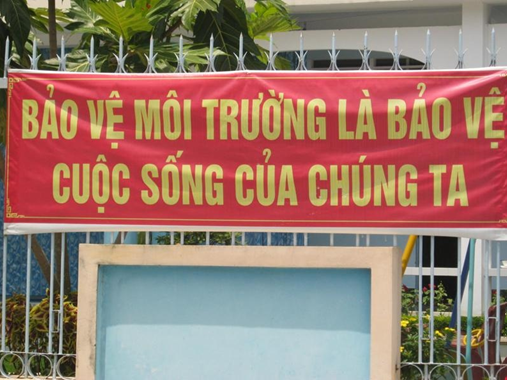

Saved 1 image to runs/detect/exp5


(199.16510009765625, 87.3648452758789, 328.21197509765625, 142.94573974609375)


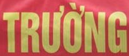

TRƯỜNG
(387.7341613769531, 81.19497680664062, 453.0399475097656, 142.73992919921875)


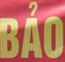

BẢU
(20.461071014404297, 81.71280670166016, 80.60681915283203, 142.36468505859375)


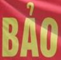

BẢO
(133.3926544189453, 88.87116241455078, 194.490478515625, 142.60861206054688)


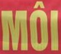

MÔI
(83.61151123046875, 88.33075714111328, 127.96218872070312, 149.56393432617188)


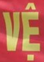

VỆ
(337.0229187011719, 87.43170928955078, 378.3719482421875, 141.14259338378906)


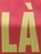

LÀ
(51.61803436279297, 153.86529541015625, 132.77322387695312, 213.52711486816406)


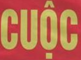

CUỘC
(233.92587280273438, 147.25376892089844, 300.2901916503906, 208.06004333496094)


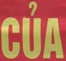

CỦA
(461.0945129394531, 83.55479431152344, 506.84478759765625, 153.22715759277344)


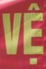

VỆ
(308.858642578125, 152.18687438964844, 419.0634460449219, 209.8428192138672)


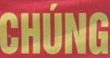

CHÚNG
(138.21165466308594, 148.10353088378906, 225.57801818847656, 208.14523315429688)


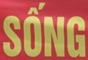

SỐNG
(427.6392517089844, 162.50344848632812, 470.6305847167969, 209.68643188476562)


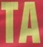

TA


In [ ]:
image = "/content/5.png"
Yolov5(image,1) #1: custom(defaults), #2: pretrain

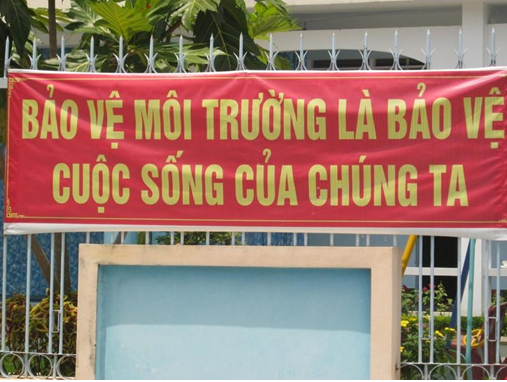

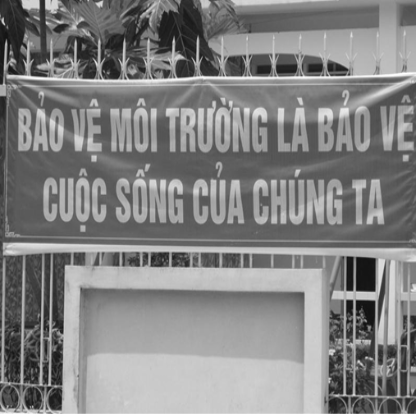

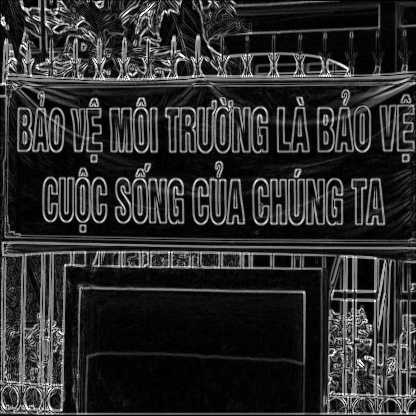

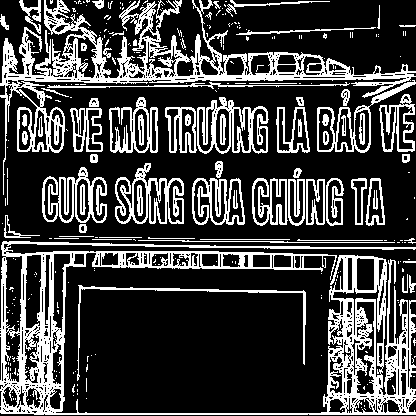

Lay nguong:  70.0


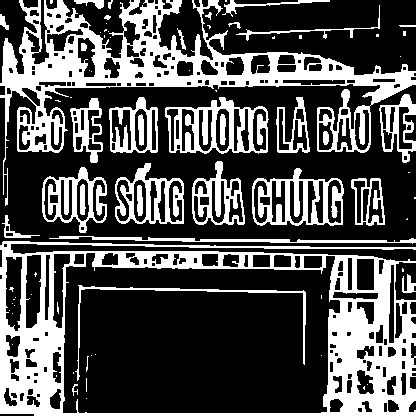

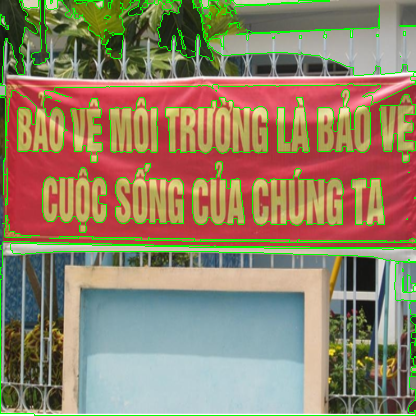

IS


-


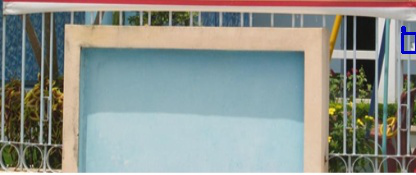

UST


-


-


Long


-


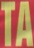

TA


THUỐC


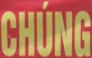

CHÚNG


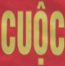

CUỘC


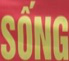

SỐNG


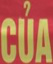

CỦA


Chúc


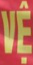

VỆ


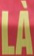

LÀ


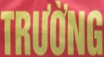

TRƯỜNG


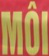

MÔI


THUỐC


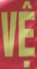

VỆ


-


theo


-


-


/


THUYỀN


-


-


1


-


-


1


Chúc


-


-


23


-


(


K


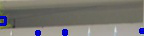

ĐỊNH


Scommo


-


/


AN


/


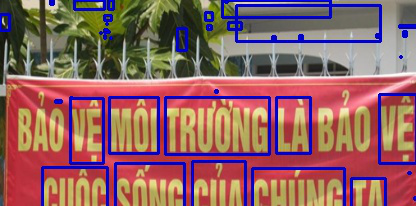

CHI


In [ ]:
image_path='/content/5.png'
ddepth = cv2.CV_64F
kernel=(3, 3)
Demo(image_path, ddepth, kernel)